In [1]:
# In Colab, upload your file from local
from google.colab import files
uploaded = files.upload()


import pandas as pd
import io

# Load dataset
df = pd.read_csv(io.BytesIO(uploaded["Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv"]))


Saving Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv to Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv


In [2]:
print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None
(1918, 7)


In [3]:
print(df['Date'].head(10).tolist())
print(df['Date'].tail(10).tolist())

['30/08/2024', '15/09/2023', '28/12/2021', '11/01/2023', '11/09/2021', '31/01/2020', '01/03/2023', '17/07/2021', '07/03/2023', '12/11/2020']
['13/07/2023', '24/09/2021', '14/04/2024', '14/11/2022', '28/09/2020', '19/01/2023', '16/08/2023', '10/01/2022', '04/05/2020', '26/07/2023']


In [4]:
df['ParsedDate'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
print(df[['Date','ParsedDate']].head(10))
print(df['ParsedDate'].isna().sum(), 'NaT out of', len(df))

         Date ParsedDate
0  30/08/2024 2024-08-30
1  15/09/2023 2023-09-15
2  28/12/2021 2021-12-28
3  11/01/2023 2023-01-11
4  11/09/2021 2021-09-11
5  31/01/2020 2020-01-31
6  01/03/2023 2023-03-01
7  17/07/2021 2021-07-17
8  07/03/2023 2023-03-07
9  12/11/2020 2020-11-12
0 NaT out of 1918


        Local Route    Light Rail  Peak Service   Rapid Route       School
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306
min        1.000000      0.000000      0.000000      0.000000     0.000000
25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000
50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000
75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000
max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000


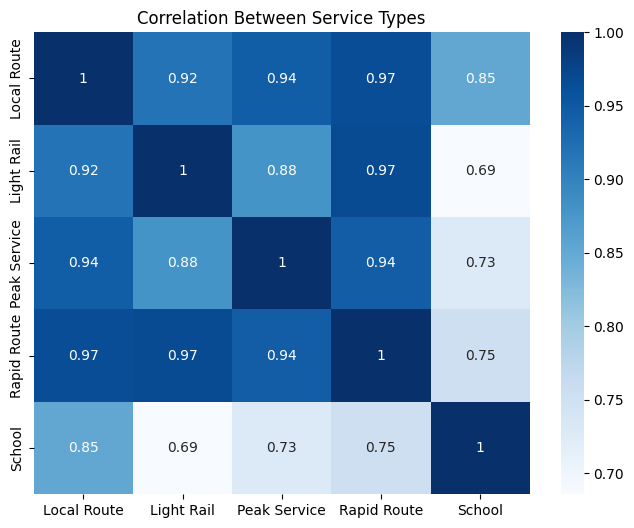

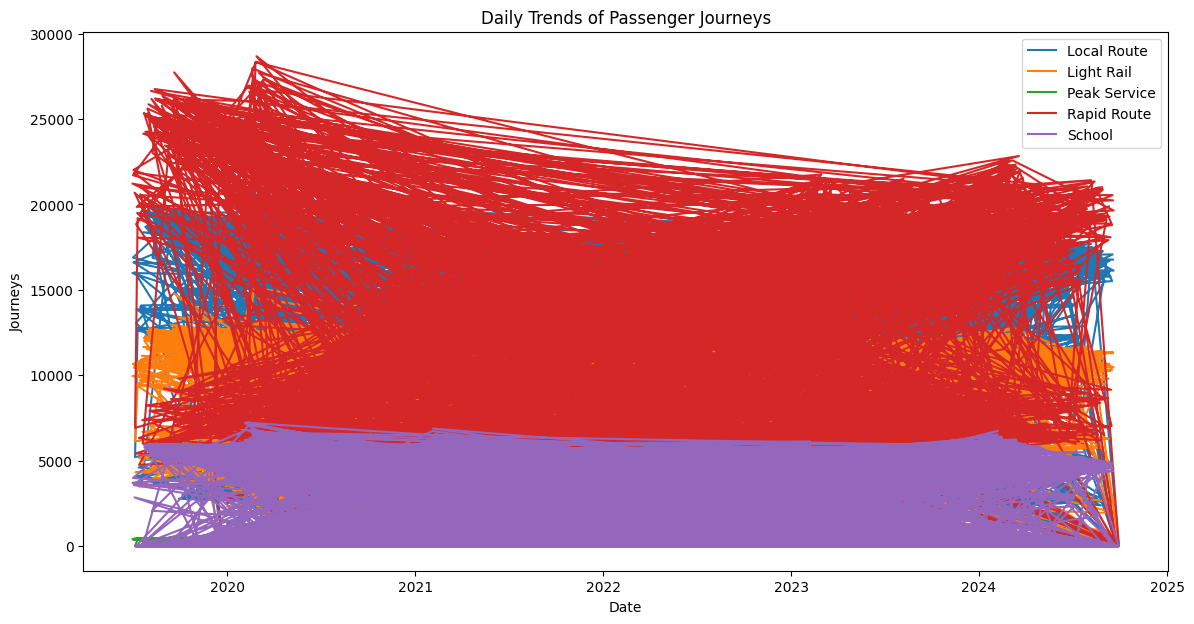

Outliers in Local Route: 20
Outliers in Light Rail: 20
Outliers in Peak Service: 20
Outliers in Rapid Route: 20
Outliers in School: 20


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fields = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

# Descriptive statistics
print(df[fields].describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[fields].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Service Types")
plt.show()

# Daily trend plot
plt.figure(figsize=(14,7))
for col in fields:
    plt.plot(df['ParsedDate'], df[col], label=col)
plt.legend()
plt.title("Daily Trends of Passenger Journeys")
plt.xlabel("Date")
plt.ylabel("Journeys")
plt.show()

# Outliers check
for col in fields:
    outliers = df[df[col] > df[col].quantile(0.99)]
    print(f"Outliers in {col}: {outliers.shape[0]}")


Local Route, Light Rail, Peak Service, and Rapid Route have strong correlations (0.92–0.97), meaning passenger volumes often rise together.

Insight: Changes in one service (special events, disruptions) will likely affect all others; coordinated planning is required.





School Service:
School journeys are less correlated (0.69–0.85), suggesting they're driven by different factors (school days, exam periods).

Insight: School bus routing and frequency should be planned independently from other routes.


Outliers:
20 spikes per service type are likely around holidays, festivals, or disruptions.
Insight: Preemptively increase capacity on these days (consult holiday calendar for exact dates).

In [10]:
# Make sure the df is sorted by ParsedDate ascending
df = df.sort_values('ParsedDate').reset_index(drop=True)

# Set the index and reindex to daily frequency
# Fill missing days with interpolation or forward fill if needed
df_daily = df.set_index('ParsedDate')

# Reindex to cover every day between min and max date
date_range = pd.date_range(df_daily.index.min(), df_daily.index.max(), freq='D')
df_daily = df_daily.reindex(date_range)

# Fill missing values (fwd fill recommended for daily passenger data)
df_daily = df_daily.fillna(method='ffill')

print(df_daily.head(), df_daily.tail())


                  Date  Local Route  Light Rail  Peak Service  Rapid Route  \
2019-07-01  01/07/2019        15987        9962           407        21223   
2019-07-02  02/07/2019        16895       10656           409        21715   
2019-07-03  03/07/2019        16613       10658           427        22025   
2019-07-04  04/07/2019        16604       10445           437        21868   
2019-07-05  05/07/2019        16040       10532           400        20697   

            School  Other  
2019-07-01    3715    NaN  
2019-07-02    3993    NaN  
2019-07-03    3638    NaN  
2019-07-04    3576    NaN  
2019-07-05    2856    NaN                     Date  Local Route  Light Rail  Peak Service  Rapid Route  \
2024-09-25  25/09/2024           21           0             1           10   
2024-09-26  26/09/2024            9           0             0            0   
2024-09-27  27/09/2024            6           0             0           13   
2024-09-28  28/09/2024            1           0    

/tmp/ipython-input-3923804621.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily = df_daily.fillna(method='ffill')


#SARIMAX

In [18]:
fields = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
forecast_days = 7
last_date = df_daily.index.max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_days)

forecast_results = {}
for col in fields:
    ts = df_daily[col].astype(float)
    model = SARIMAX(ts, order=(1,1,1), seasonal_order=(0,1,1,7),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.get_forecast(steps=forecast_days).predicted_mean
    forecast_results[col] = np.round(forecast).astype(int)

forecast_df = pd.DataFrame(forecast_results, index=future_dates)
print("Forecast for next 7 days:")
print(forecast_df)

forecast_df_clipped = forecast_df.clip(lower=0)
print("Clipped SARIMAX Forecast for next 7 days:")
print(forecast_df_clipped)


Forecast for next 7 days:
            Local Route  Light Rail  Peak Service  Rapid Route  School
2024-09-30         5926        2747           177         4950    2329
2024-10-01         5844        2922           179         5336    2340
2024-10-02         5436        2879           174         4924    2209
2024-10-03         5080        2520           135         4573    2201
2024-10-04         2092        1245            50          390    1050
2024-10-05        -4772       -1980          -113        -5363      -1
2024-10-06        -6071       -3138          -113        -6472      -1
Clipped SARIMAX Forecast for next 7 days:
            Local Route  Light Rail  Peak Service  Rapid Route  School
2024-09-30         5926        2747           177         4950    2329
2024-10-01         5844        2922           179         5336    2340
2024-10-02         5436        2879           174         4924    2209
2024-10-03         5080        2520           135         4573    2201
2024-10-0

#Holt Winters

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_results = {}
for col in fields:
    ts = df_daily[col].astype(float)
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=7)
    fit = model.fit()
    forecast = fit.forecast(7)
    hw_results[col] = forecast.round().astype(int).to_numpy()

holt_df = pd.DataFrame(hw_results, index=future_dates)
print(holt_df.clip(lower=0))  # Report clipped at 0 if any negatives remain


            Local Route  Light Rail  Peak Service  Rapid Route  School
2024-09-30         3865        2374           116         3797     876
2024-10-01         5465        3095           151         5934    1438
2024-10-02         5984        3462           166         6508    1702
2024-10-03         6213        3370           139         6773    1958
2024-10-04         3181        2213            59         2785     963
2024-10-05            0           0             0            0       0
2024-10-06            0           0             0            0       0


#Prophet

In [16]:
!pip install prophet --quiet

from prophet import Prophet
import pandas as pd
import numpy as np

fields = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
forecast_days = 7
forecast_results = {}

for col in fields:
    ts_df = df[['ParsedDate', col]].rename(columns={'ParsedDate': 'ds', col: 'y'})
    m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, stan_backend=None)
    m.fit(ts_df)
    future = m.make_future_dataframe(periods=forecast_days)
    forecast = m.predict(future)
    yhat = forecast['yhat'][-forecast_days:].round().astype(int).to_numpy()
    forecast_results[col] = yhat

future_dates = pd.date_range(df['ParsedDate'].max() + pd.Timedelta(days=1), periods=forecast_days)
prophet_df = pd.DataFrame(forecast_results, index=future_dates)
# Optionally clip negatives for reporting:
prophet_df = prophet_df.clip(lower=0)
print("Prophet forecast for next 7 days:")
print(prophet_df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.1 MB/s eta 0:00:00
Prophet forecast for next 7 days:
            Local Route  Light Rail  Peak Service  Rapid Route  School
2024-09-30        10495        7583           224        13451    1425
2024-10-01        12290        8638           269        15559    1849
2024-10-02        12455        8680           269        15646    1909
2024-10-03        12304        8600           242        15457    1812
2024-10-04        11775        8630           191        14750    1629
2024-10-05         2627        5166             0         6564       0
2024-10-06         1702        3809             0         5115       0


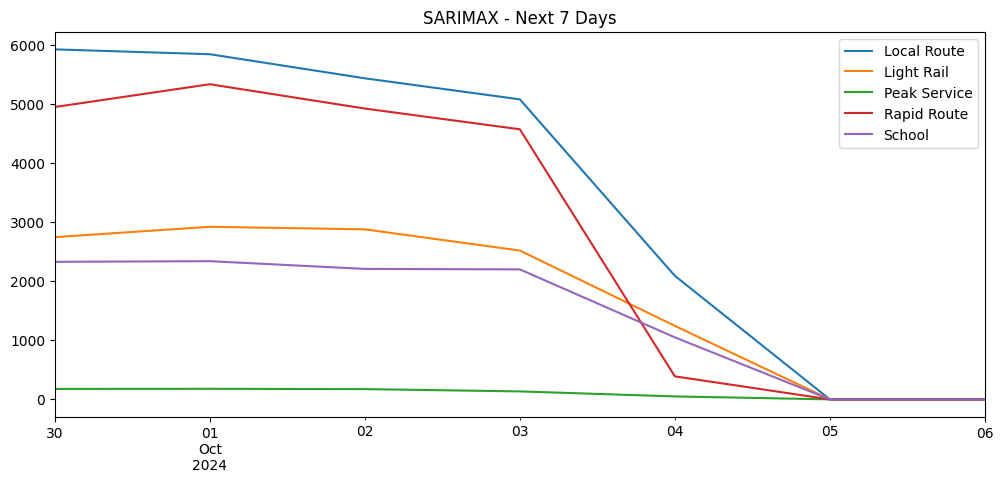

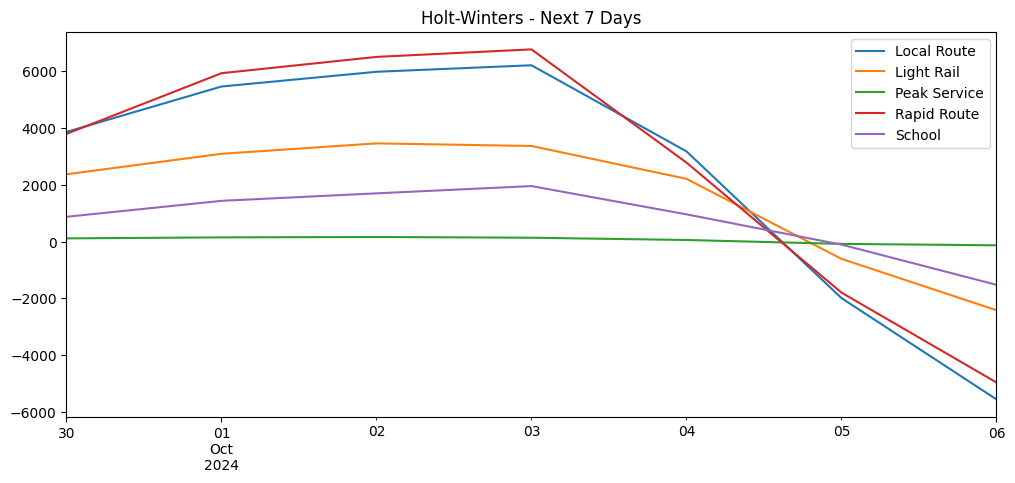

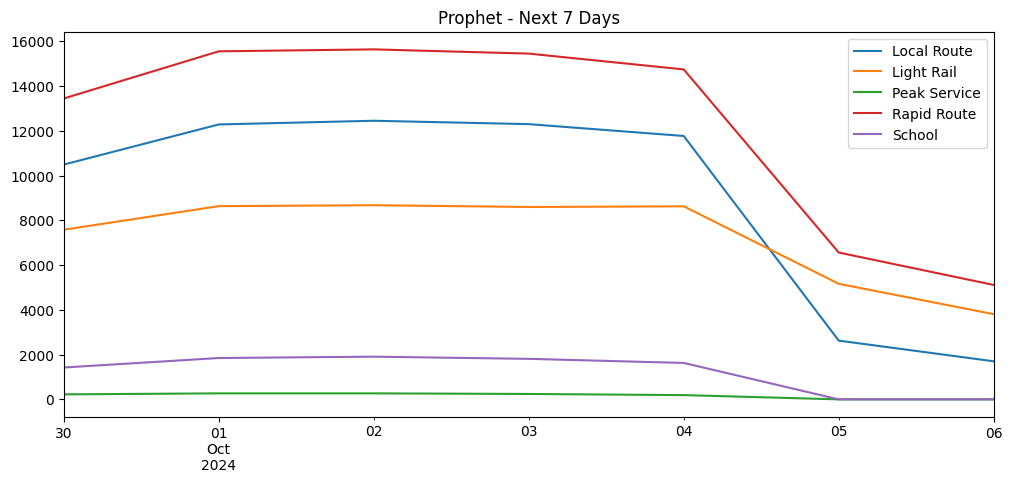

In [19]:
for model_name, df_pred in [('SARIMAX', forecast_df_clipped), ('Holt-Winters', holt_df), ('Prophet', prophet_df)]:
    df_pred.plot(figsize=(12,5), title=f"{model_name} - Next 7 Days")
    plt.show()


#SARIMAX

In [21]:
forecast_days = 7
# Use all data *except* last 7 days for training
train = df_daily.iloc[:-forecast_days]
test = df_daily.iloc[-forecast_days:]

# For each field/model:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred_hist = {}
for col in fields:
    ts = train[col].astype(float)
    model = SARIMAX(ts, order=(1,1,1), seasonal_order=(0,1,1,7),
                    enforce_stationarity=False, enforce_invertibility=False)
    fit = model.fit(disp=False)
    preds = fit.get_forecast(steps=forecast_days).predicted_mean
    pred_hist[col] = preds.values

# Convert to DataFrame
pred_hist_df = pd.DataFrame(pred_hist, index=test.index)

# Calculate error metrics


for col in fields:
    y_true = test[col].values
    y_pred = pred_hist_df[col].values
    print(f"{col} MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{col} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

Local Route MAE: 9182.21
Local Route RMSE: 10683.84
Light Rail MAE: 5307.34
Light Rail RMSE: 5934.65
Peak Service MAE: 213.51
Peak Service RMSE: 250.46
Rapid Route MAE: 9555.39
Rapid Route RMSE: 11242.76
School MAE: 2976.95
School RMSE: 3620.69


#Holt Winters

In [24]:
forecast_days = 7
# Use all data *except* last 7 days for training
train = df_daily.iloc[:-forecast_days]
test = df_daily.iloc[-forecast_days:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

holt_preds = {}
for col in fields:
    ts = train[col].astype(float)
    model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=7)
    fit = model.fit()
    preds = fit.forecast(forecast_days)
    holt_preds[col] = preds.values

holt_pred_df = pd.DataFrame(holt_preds, index=test.index)

for col in fields:
    y_true = test[col].values
    y_pred = holt_pred_df[col].values
    print(f"{col} MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{col} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")


Local Route MAE: 8791.87
Local Route RMSE: 10257.08
Light Rail MAE: 5125.08
Light Rail RMSE: 5669.08
Peak Service MAE: 205.17
Peak Service RMSE: 239.92
Rapid Route MAE: 9409.49
Rapid Route RMSE: 10893.56
School MAE: 2667.83
School RMSE: 3148.44


#Prophet

In [27]:
for col in fields:
    # Reset index and set the date column for Prophet
    ts_df = train.reset_index().rename(columns={'index':'ds'})[['ds', col]].rename(columns={col: 'y'})
    m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
    m.fit(ts_df)
    future = m.make_future_dataframe(periods=forecast_days)
    forecast = m.predict(future)
    yhat = forecast['yhat'][-forecast_days:].values
    prophet_preds[col] = yhat

prophet_pred_df = pd.DataFrame(prophet_preds, index=test.index)

for col in fields:
    y_true = test[col].values
    y_pred = prophet_pred_df[col]
    print(f"{col} MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{col} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")


Local Route MAE: 10600.46
Local Route RMSE: 11619.98
Light Rail MAE: 8023.67
Light Rail RMSE: 8268.63
Peak Service MAE: 199.29
Peak Service RMSE: 232.36
Rapid Route MAE: 14048.77
Rapid Route RMSE: 14738.95
School MAE: 2029.66
School RMSE: 2075.99


#Comparision

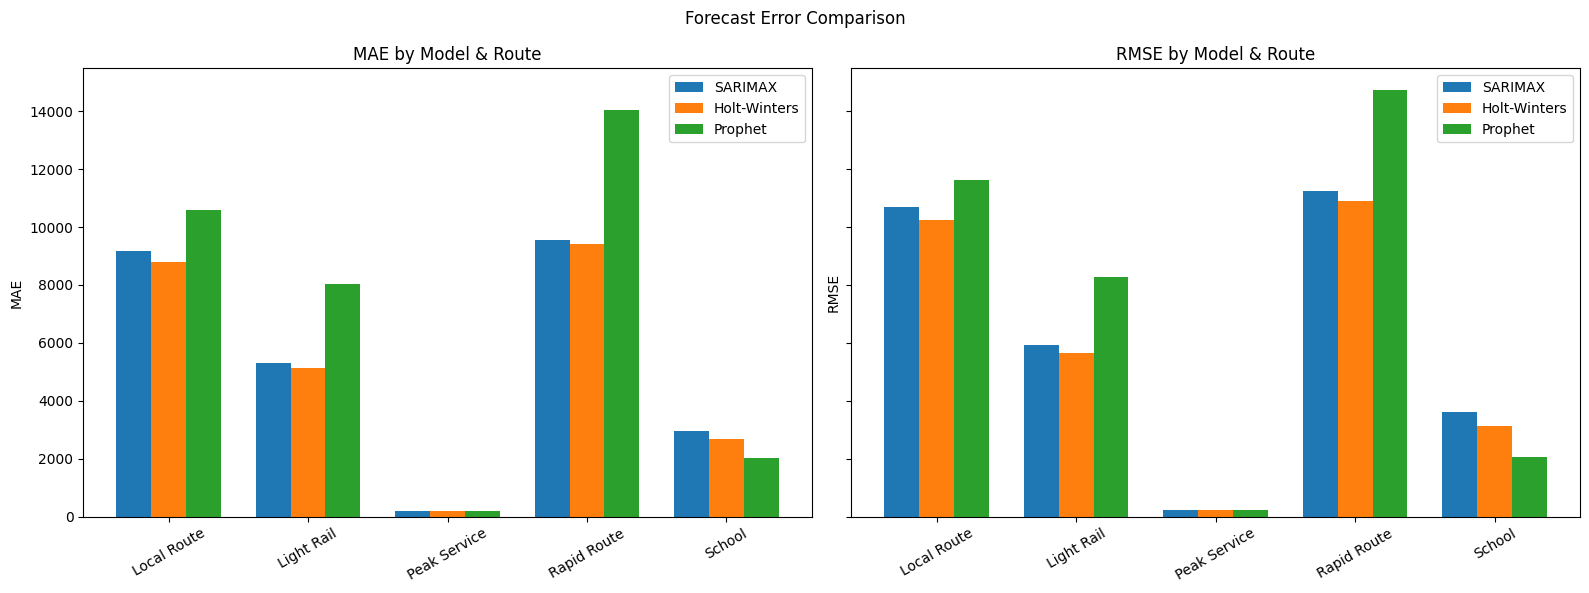

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fill in your actual results here:
routes = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

mae_data = {
    'SARIMAX':  [9182.21, 5307.34, 213.51, 9555.39, 2976.95],
    'Holt-Winters': [8791.87, 5125.08, 205.17, 9409.49, 2667.83],
    'Prophet':  [10600.46, 8023.67, 199.29, 14048.77, 2029.66]
}

rmse_data = {
    'SARIMAX':  [10683.84, 5934.65, 250.46, 11242.76, 3620.69],
    'Holt-Winters': [10257.08, 5669.08, 239.92, 10893.56, 3148.44],
    'Prophet':  [11619.98, 8268.63, 232.36, 14738.95, 2075.99]
}

x = np.arange(len(routes))
width = 0.25  # Width of bars

fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# MAE
ax[0].bar(x - width, mae_data['SARIMAX'], width, label='SARIMAX')
ax[0].bar(x, mae_data['Holt-Winters'], width, label='Holt-Winters')
ax[0].bar(x + width, mae_data['Prophet'], width, label='Prophet')
ax[0].set_title('MAE by Model & Route')
ax[0].set_xticks(x)
ax[0].set_xticklabels(routes, rotation=30)
ax[0].set_ylabel('MAE')
ax[0].legend()

# RMSE
ax[1].bar(x - width, rmse_data['SARIMAX'], width, label='SARIMAX')
ax[1].bar(x, rmse_data['Holt-Winters'], width, label='Holt-Winters')
ax[1].bar(x + width, rmse_data['Prophet'], width, label='Prophet')
ax[1].set_title('RMSE by Model & Route')
ax[1].set_xticks(x)
ax[1].set_xticklabels(routes, rotation=30)
ax[1].set_ylabel('RMSE')
ax[1].legend()

fig.suptitle('Forecast Error Comparison')
plt.tight_layout()
plt.show()
